<a href="https://colab.research.google.com/github/teerasitk/01205415/blob/main/Assignment08_2024_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8
Portfolio Optimization and Pair Trading Stategy

In [ ]:
!pip install yfinance
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

In [ ]:
day_per_year = 252

In [ ]:
def getMVPortfolio(mu: np.ndarray, # average return vector assets
                   cov_mat: np.ndarray # covarance matrix of assets
                   ) -> np.ndarray:
  """
    Find minumum variance portfolio with average target return at r_star
  """
  n = len(mu) # number of assets
  A = np.zeros((n + 1 , n + 1))
  b = np.zeros((n + 1 ,))
  ones = np.ones((n,))
  A[:n, :n] = cov_mat
  A[:n, n ] = -ones
  A[n, :n] = ones
  b[n ] = 1
  x = np.linalg.solve(A,b)
  w_opt = x[:n]
  return w_opt

In [ ]:
def getOptimumPortfolio(mu: np.ndarray, # average return vector assets
                        cov_mat: np.ndarray, # covarance matrix of assets
                        r_star: float) -> np.ndarray:
  """
    Find optimum portfolio with average target return at r_star
  """
  n = len(mu) # number of assets
  A = np.zeros((n + 1 + 1, n + 1 +1))
  b = np.zeros((n + 1 +1,))
  ones = np.ones((n,))
  A[:n, :n] = cov_mat * day_per_year* day_per_year
  A[:n, n] = - mu * day_per_year
  A[:n, n + 1] = -ones
  A[n, :n] = mu *day_per_year
  A[n+1, :n] = ones
  b[n] = r_star #/ day_per_year # change to daily target returns
  b[n + 1] = 1
  x = np.linalg.solve(A,b)
  w_opt = x[:n]
  return w_opt

In [ ]:
def findPortRetunAndRisk(w: np.ndarray,
                         mu:np.ndarray,
                         cov_mat: np.ndarray,
                         ):
  mu_port = np.dot(w, mu) * day_per_year
  sigma_port =  np.sqrt(np.dot(np.dot(w.T, cov_mat), w) * day_per_year)
  return mu_port, sigma_port

In [ ]:
def buildEfficientFrontier(mu: np.ndarray, # average return vector assets
                           cov_mat: np.ndarray, # covarance matrix of assets
                           r_max: float = None
                           ) -> Tuple[np.ndarray, np.ndarray]:
  """

  """
  w_mvp = getMVPortfolio(mu, cov_mat)
  r_min = np.dot(w_mvp , mu)  * day_per_year
  if r_max is None:
    r_max = mu.max() * 1.5  * day_per_year
  print(r_min, r_max)
  mean_array = np.linspace(r_min, r_max, 1000)
  vol_array = np.zeros((1000,))
  for k, r in enumerate(mean_array):
    w_opt = getOptimumPortfolio(mu, cov_mat, r_star=r)
    r, vol = findPortRetunAndRisk(w_opt, mu, cov_mat)
    vol_array[k] = vol
  return mean_array, vol_array

# 1. Find Efficient Market Porfolio in 2023 from stocks in the list given below

In [ ]:
# stock_list = ['ADVANC', 'AOT', 'AWC', 'BANPU', 'BBL', 'BDMS', 'BEM', 'BGRIM',
#               'BH','BLA', 'BTS', 'CBG', 'CPALL', 'CPF', 'CPN', 'CRC', 'EA',
#               'EGCO', 'GLOBAL', 'GPSC', 'GULF', 'HMPRO', 'INTUCH', 'IRPC', 'IVL',
#               'JMART', 'JMT', 'KBANK', 'KCE', 'KTB', 'KTC', 'LH', 'MINT', 'MTC',
#               'OR', 'OSP', 'PTT', 'PTTEP', 'PTTGC', 'SAWAD', 'SCC', 'SCGP',
#               'TIDLOR', 'TISCO', 'TOP', 'TRUE', 'TTB', 'TU']
stock_list = [ 'BANPU', 'BDMS','EA', 'GULF', 'IVL','KTB','OR','TU']

In [ ]:
stock_info = dict() # create empty dictionary
for sym in stock_list:
  df = yf.download(sym + ".BK", start="2021-01-01", end="2023-12-31") # download 2023 data
  close_price = df['Close']
  ret = close_price.pct_change(1)
  ret = ret.dropna()
  stock_info[sym] = ret
returns = pd.DataFrame(data=stock_info, index=ret.index)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Your code is hdre
target = 0.1
mu = returns.mean()
cov_mat =returns.cov()
w_opt = getOptimumPortfolio(mu=mu, cov_mat=cov_mat, r_star=target)
w_opt = pd.Series(data=w_opt, index=mu.index)
out = np.abs(w_opt).sort_values()
w_opt[out.index]

IVL     -0.001619
EA      -0.018105
BANPU    0.077031
OR       0.077800
GULF     0.152186
TU       0.169835
KTB      0.258913
BDMS     0.283959
dtype: float64

## Solution: Find the top 5 stocks in the market portfolio. Here, we only consider the magnitude
1.  TISCO 	Position: Long (0.361)
2. ADVANC 	Position:Long (0.138)
3. PTT 	Position: Long (0.131)
4. LH 	Position: Long (0.122)
5. KTB 	Position: Long (0.093)

# 2. Do you think it is possible to construct the market portfolio? why?


## Solution:
Yes since no asset is more than 100%

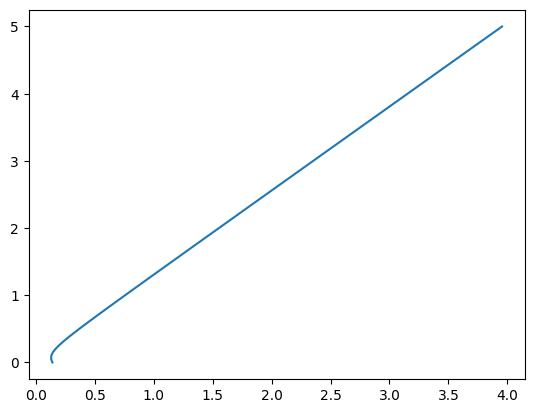

In [ ]:
rets = np.linspace(0, 5,100)
mu_port = []
vol_port = []
for r in rets:
  w_opt = getOptimumPortfolio(mu=mu, cov_mat=cov_mat, r_star=r)
  mu_opt, vol_opt = findPortRetunAndRisk(w_opt, mu, cov_mat)
  mu_port.append(mu_opt)
  vol_port.append(vol_opt)
plt.plot(vol_port, mu_port)

0.06973766662849465 5


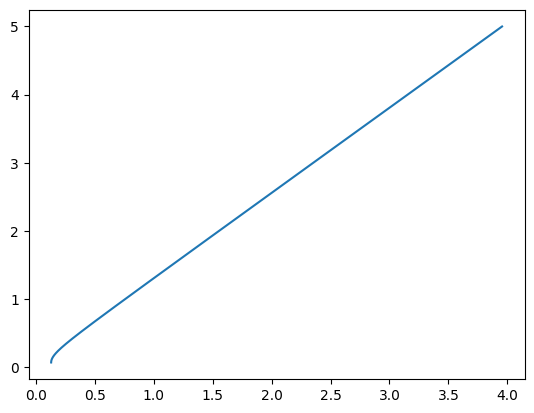

In [ ]:
mus, vols = buildEfficientFrontier(mu, cov_mat, r_max = 5)
plt.plot(vols, mus)

#3. Plot the Capital Market Line where $r_f=2\%$

In [ ]:
import scipy.optimize as opt
from typing import Tuple
def findMarketPortfolio(mu_array:np.ndarray,
                        cov_mat:np.ndarray ,
                        rf:float
                        ) -> Tuple[np.ndarray, float, float]:
  """
    Find Market Portfolio for a given risk-free interest rate
    :param data_frames: data_frames of simple returns
    :param rf: risk-free interest rate
    :return:
      w_opt: Market portfolio
      vol_opt: volatility of the market portfolio
      ret_best: return of the market portfolio
  """
  def sharpe_ratio(target_ret):
    w = getOptimumPortfolio(mu_array, cov_mat, target_ret)
    mu, sigma = findPortRetunAndRisk(w, mu_array, cov_mat)
    return (mu - rf)/sigma
  r_max = -1e100
  days_in_year = 365
  w_mvp = getMVPortfolio(mu_array, cov_mat)
  r_min, sigma_min = findPortRetunAndRisk(w_mvp, mu_array, cov_mat)
  best_solution = opt.minimize(lambda x: -sharpe_ratio(x), r_min)
  ret_best = best_solution['x'][0]
  w_opt = getOptimumPortfolio(mu_array, cov_mat, ret_best)
  mu_opt, sigma_opt = findPortRetunAndRisk(w_opt, mu_array, cov_mat)
  return w_opt , sigma_opt, mu_opt


In [ ]:

def plotCapitalMarketLine(mu, cov_mat,
                          w_market:np.ndarray,
                          vol_market:float,
                          ret_market:float,
                          rf:float):
  """
  Plot the capital market line
  :param data_frames: Simple return
  :param w_market: Market Portfolio
  :param vol_mark: Market Portfolio volatility
  :param: ret_market: Maker Portfolio Return
  :parma: rf: risk-free interest
  """
  rets, vols = buildEfficientFrontier(mu, cov_mat, r_max=ret_market*2)
  slope = (ret_market - rf)/vol_market
  print(slope)
  ret_array_line = vols*slope + rf
  plt.plot(vols, rets, vols, ret_array_line)
  plt.scatter(vol_market, ret_market, c="red")
  plt.text(vol_market*1.01, ret_market, "Market Portfolio")
  plt.xlabel("volatility")
  plt.ylabel("return")
  plt.grid()
  title = "Capital Market Line with "
  for symbol in mu.index:
    title += symbol +" "
  plt.title(title)
  plt.legend(["Efficient Frontier", "Capital Market Line"])
  plt.show()

In [ ]:
# your code is here
w_mvp = getMVPortfolio(mu, cov_mat)
findPortRetunAndRisk(w_mvp, mu, cov_mat)

(0.015597660577407727, 0.1563280087162792)

In [ ]:
w_market, vol_market, mu_market = findMarketPortfolio(mu, cov_mat,rf=0.02)
findPortRetunAndRisk(w_market, mu, cov_mat)

<ipython-input-94-d5360aba2d04>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[n] = r_star #/ day_per_year # change to daily target returns


(0.5897742310432075, 0.43646977568076545)

In [ ]:
vol_market, mu_market

(0.43646977568076545, 0.5897742310432075)

0.06973766662849465 1.179548462086415
1.305415088947513


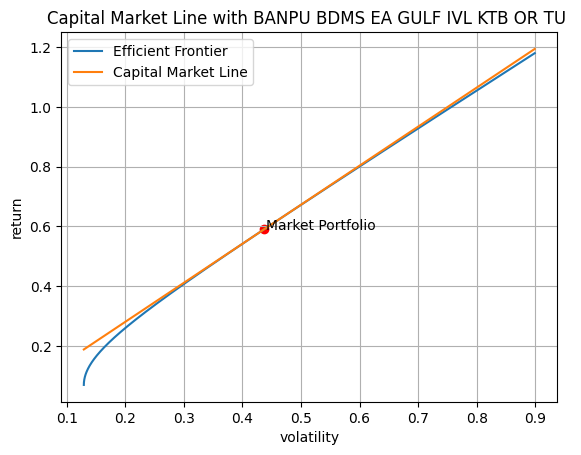

In [ ]:
plotCapitalMarketLine(mu, cov_mat, w_market, vol_market, mu_market , rf=0.02)